# Billboard Chart-Points EDA

This is where I'll make the basic EDA charts for chart-points. I'm replicating slides 6-13 in my initial slideshow

In [1]:
# Packages and Settings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from datetime import datetime
from IPython.display import display


%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [3]:
#shape of initial dataframe
billboard_df.shape

(317795, 10)

In [4]:
# Checking Initial Head
billboard_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1990-0...,2/10/1990,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1
1,http://www.billboard.com/charts/hot-100/1990-0...,2/17/1990,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2
2,http://www.billboard.com/charts/hot-100/1990-0...,2/24/1990,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3
3,http://www.billboard.com/charts/hot-100/1990-0...,3/3/1990,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4
4,http://www.billboard.com/charts/hot-100/1990-0...,3/10/1990,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5


In [5]:
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [6]:
# Renaming columns to Python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [7]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

In [8]:
#creating date/month/day/year columns

billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [9]:
billboard_df['has_feature'] = billboard_df.performer.apply(lambda x: 1 if 'Featuring' in x else 0)

In [10]:
# Calculating "Week-Points"- my way of considering chart position

billboard_df['chart_points'] = billboard_df.apply(lambda row: 101- row.week_position, axis=1)

In [11]:
billboard_df.head(500)

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,has_feature,chart_points
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,0,26
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,0,48
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,0,58
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,0,64
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,0,74
5,1990-03-17,24,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,27.0,24,6,1990-03-17,3,17,1990,0,77
6,1990-03-24,12,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,24.0,12,7,1990-03-24,3,24,1990,0,89
7,1990-03-31,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,12.0,6,8,1990-03-31,3,31,1990,0,95
8,1990-04-07,6,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,6,9,1990-04-07,4,7,1990,0,95
9,1990-04-14,2,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,6.0,2,10,1990-04-14,4,14,1990,0,99


In [14]:
# creating groupby for performers

performer_summed_groupby = billboard_df.groupby('performer').sum()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
performer,,,,,,,,,,
"""Groove"" Holmes",1000,14,846.0,982,72,112,198,27524,0,414
"""Little"" Jimmy Dickens",422,10,375.0,377,55,110,168,19650,0,588
"""Pookie"" Hudson",96,1,0.0,96,1,5,25,1963,0,5
"""Weird Al"" Yankovic",5492,91,4462.0,3897,601,544,1458,181406,0,3699
'N Sync,5006,172,4478.0,3356,2004,1042,2577,343972,0,12366


In [18]:
performer_summed_groupby = performer_summed_groupby.sort_values(by=['chart_points'], ascending=False)

In [19]:
performer_summed_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
performer,,,,,,,,,,
Madonna,29188,857,24576.0,12426,8391,5545,13405,1707296,0,57369
Elton John,34312,892,29773.0,23644,8165,6053,13817,1764035,0,55477
Taylor Swift,33121,1324,27140.0,20768,12746,5787,13843,1748032,0,54648
Mariah Carey,14851,735,12428.0,7015,7517,4056,9477,1213160,0,46456
Stevie Wonder,24017,659,20465.0,17915,5147,4291,10293,1302158,0,42542


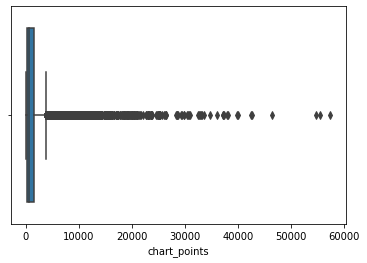

In [17]:
# plotting distribution of "chart_points" by performer

ax = sns.boxplot(x="chart_points", data=performer_summed_groupby)

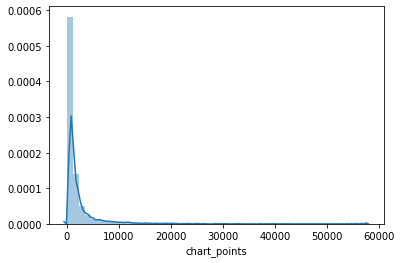

In [20]:
# distplot for chart_points by artist
ax = sns.distplot(performer_summed_groupby.chart_points)

In [21]:
performer_summed_groupby.chart_points.describe()

count     9553.000000
mean      1679.982623
std       3642.601761
min          1.000000
25%        119.000000
50%        580.000000
75%       1562.000000
max      57369.000000
Name: chart_points, dtype: float64

In [22]:
# calculating cutoff for outliers

IQR = 1562 + (1.5 * (1562-119))

In [23]:
# note: I did not do this in my initial notebook, which is why the numbers feel weird. 
print(IQR)

3726.5


In [29]:
performer_summed_groupby.head(1003)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
performer,,,,,,,,,,
Madonna,29188,857,24576.0,12426,8391,5545,13405,1707296,0,57369
Elton John,34312,892,29773.0,23644,8165,6053,13817,1764035,0,55477
Taylor Swift,33121,1324,27140.0,20768,12746,5787,13843,1748032,0,54648
Mariah Carey,14851,735,12428.0,7015,7517,4056,9477,1213160,0,46456
Stevie Wonder,24017,659,20465.0,17915,5147,4291,10293,1302158,0,42542
The Beatles,16615,600,13266.0,12363,3548,3600,9157,1151382,0,42470
Drake,30393,741,23189.0,19010,6807,4633,10863,1404599,0,40004
Michael Jackson,21742,620,18314.0,12248,5531,3942,9559,1209852,0,39767
Rihanna,19057,668,16611.0,12592,7404,3752,8835,1138046,0,38109


In [30]:
performer_chart_points_outliers_df = performer_summed_groupby.head(1002)

In [31]:
performer_chart_points_outliers_df.shape

(1002, 10)

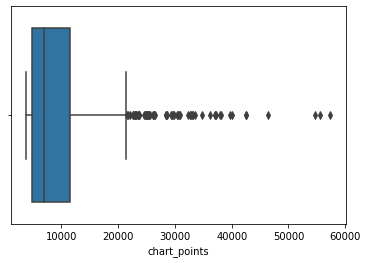

In [32]:
ax = sns.boxplot(x="chart_points", data=performer_chart_points_outliers_df)

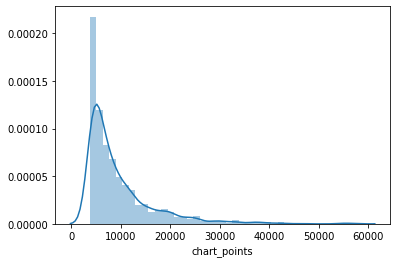

In [33]:
ax = sns.distplot(performer_chart_points_outliers_df.chart_points)

In [34]:
# OK, time to do the same stuff by song 

song_id_summed_groupby = billboard_df.groupby('song_id').sum()

In [35]:
song_id_summed_groupby = song_id_summed_groupby.sort_values(by=['chart_points'], ascending=False)

In [36]:
song_id_summed_groupby.head()

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
song_id,,,,,,,,,,
RadioactiveImagine Dragons,2855,172,2708.0,1991,3828,562,1345,175134,0,5932
How Do I LiveLeAnn Rimes,1354,69,1309.0,411,2415,473,1093,137834,0,5615
Foolish Games/You Were Meant For MeJewel,1066,65,1019.0,457,2145,409,1030,129808,0,5499
I'm YoursJason Mraz,2243,76,2195.0,1345,2926,510,1199,152649,0,5433
Party Rock AnthemLMFAO Featuring Lauren Bennett & GoonRock,1517,135,1390.0,507,2346,429,1098,136777,68,5351


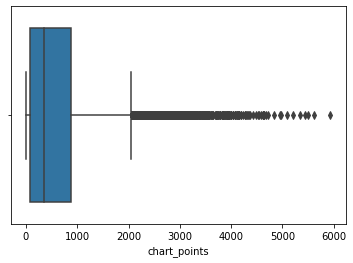

In [37]:
ax = sns.boxplot(x="chart_points", data=song_id_summed_groupby)

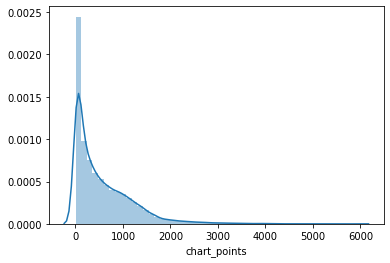

In [38]:
ax = sns.distplot(song_id_summed_groupby.chart_points)

In [39]:
# Calculating outliers for song_id 

song_id_summed_groupby.chart_points.describe()

count    28193.00000
mean       569.25031
std        625.16761
min          1.00000
25%         89.00000
50%        361.00000
75%        877.00000
max       5932.00000
Name: chart_points, dtype: float64

In [40]:
IQR = 877 + (1.5 * (877-89))

In [41]:
print(IQR)

2059.0


In [48]:
song_id_summed_groupby.head(855)

,week_position,instance,prev_week_position,peak_position,weeks_on_chart,month,day,year,has_feature,chart_points
song_id,,,,,,,,,,
RadioactiveImagine Dragons,2855,172,2708.0,1991,3828,562,1345,175134,0,5932
How Do I LiveLeAnn Rimes,1354,69,1309.0,411,2415,473,1093,137834,0,5615
Foolish Games/You Were Meant For MeJewel,1066,65,1019.0,457,2145,409,1030,129808,0,5499
I'm YoursJason Mraz,2243,76,2195.0,1345,2926,510,1199,152649,0,5433
Party Rock AnthemLMFAO Featuring Lauren Bennett & GoonRock,1517,135,1390.0,507,2346,429,1098,136777,68,5351
Shape Of YouEd Sheeran,656,58,633.0,58,1711,356,887,116995,0,5202
Counting StarsOneRepublic,1789,68,1739.0,650,2346,473,1070,136926,0,5079
Uptown Funk!Mark Ronson Featuring Bruno Mars,693,57,650.0,174,1596,374,896,112836,56,4963
Rolling In The DeepAdele,1607,129,1490.0,592,2145,389,1042,130729,0,4958


In [49]:
song_id_chart_points_outliers = song_id_summed_groupby.head(855)

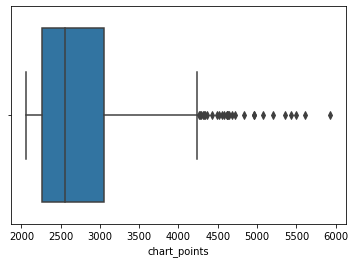

In [50]:
ax = sns.boxplot(x="chart_points", data=song_id_chart_points_outliers)

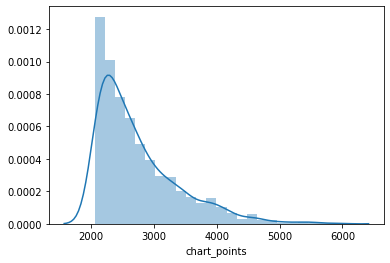

In [51]:
ax = sns.distplot(song_id_chart_points_outliers.chart_points)

# I think this is the end of this notebook- I just wanted to replicate the charts from Billboard 1.